In [30]:
import math
import numpy
from matplotlib import pyplot
%matplotlib inline

In [24]:
N = 50                                
x_start, x_end = -2.0, 2.0            
y_start, y_end = -1.0, 1.0            
x = numpy.linspace(x_start, x_end, N)    
y = numpy.linspace(y_start, y_end, N)    
X, Y = numpy.meshgrid(x, y)              

In [25]:
kappa = 1.0                        
x_doublet, y_doublet = 0.0, 0.0    

In [32]:
def vel(kappa, xd, yd, X, Y):
    
    u = - kappa / (2 * math.pi) * ((X - xd)**2 - (Y - yd)**2) / ((X - xd)**2 + (Y - yd)**2)**2
    v = - kappa / (2 * math.pi) * 2 * (X - xd) * (Y - yd) / ((X - xd)**2 + (Y - yd)**2)**2
    return u, v

In [82]:
def stream(kappa, xd, yd, X, Y):
    stream = - kappa / (2*math.pi) * (Y - yd)/((X - xd)**2+(Y - yd)**2) 
    return stream

In [83]:
u_doublet, v_doublet = vel(kappa, x_doublet, y_doublet, X, Y)
stream_doublet = stream(kappa, x_doublet, y_doublet, X, Y)

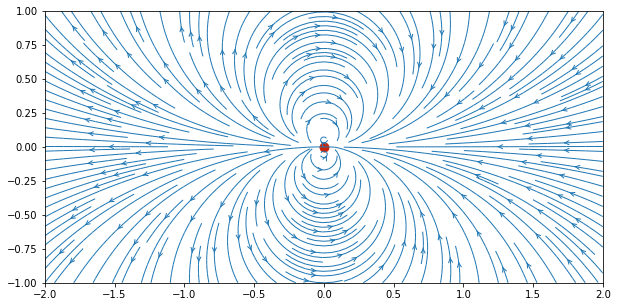

In [84]:
width = 10
height = (y_end - y_start) / (x_end - x_start) * width
pyplot.figure(figsize=(width, height))
pyplot.streamplot(X, Y, u_doublet, v_doublet, density=2, linewidth=1.0, arrowsize=1.0, arrowstyle='->');
pyplot.scatter(x_doublet, y_doublet, color='#CD2305', s=80, marker ='o');

In [85]:
u_inf = 1.0 
u_freestream = u_inf * numpy.ones((N, N), dtype=float)
v_freestream = numpy.zeros((N, N), dtype=float)

psi_freestream = u_inf * Y

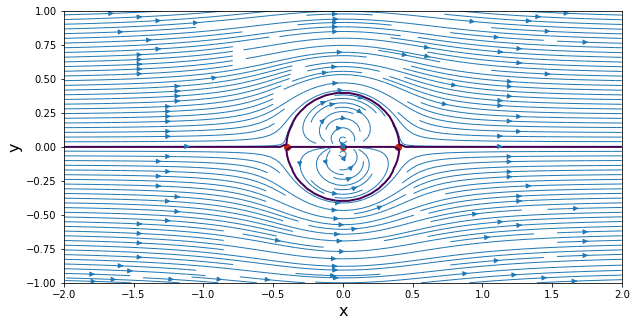

In [86]:
u = u_freestream + u_doublet
v = v_freestream + v_doublet
psi = psi_freestream + stream_doublet
width = 10
height = (y_end - y_start) / (x_end - x_start) * width
pyplot.figure(figsize=(width, height))
pyplot.xlabel('x', fontsize=16)
pyplot.ylabel('y', fontsize=16)
pyplot.streamplot(X, y, u, v, linewidth=1.0, density=2.0)
pyplot.scatter(x_doublet, y_doublet, color='#CD2305')
pyplot.contour(X, Y, psi, levels=[0.0], linewidths=2.0)
x_stangnation1, y_stangnation1 =  math.sqrt(kappa/(2*math.pi*u_inf)), 0
x_stangnation2, y_stangnation2 = -math.sqrt(kappa/(2*math.pi*u_inf)), 0
pyplot.scatter(x_stangnation1, y_stangnation1, color='#CD2305')
pyplot.scatter(x_stangnation2, y_stangnation2, color='#CD2305')

In [89]:
radius = x_stangnation1-x_doublet
radius

0.3989422804014327

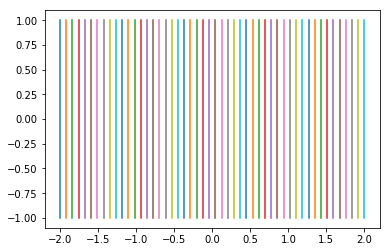

NameError: name 'x_stagnation1' is not defined

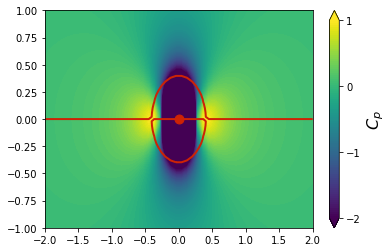

In [94]:
cp = 1.0 - (u**2 + v**2) / u_inf**2
contf = pyplot.contourf(X, Y, cp,
                        levels=numpy.linspace(-2.0, 1.0, 100), extend='both')
cbar = pyplot.colorbar(contf)
cbar.set_label('$C_p$', fontsize=16)
cbar.set_ticks([-2.0, -1.0, 0.0, 1.0])
pyplot.scatter(x_doublet, y_doublet,
               color='#CD2305', s=80, marker='o')
pyplot.contour(X,Y,psi,
               levels=[0.], colors='#CD2305', linewidths=2, linestyles='solid')
pyplot.scatter([x_stagnation1, x_stagnation2], [y_stagnation1, y_stagnation2],
               color='g', s=80, marker='o');

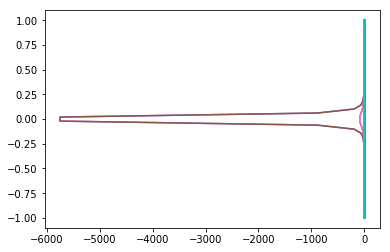

In [105]:
pyplot.plot(cp,Y);

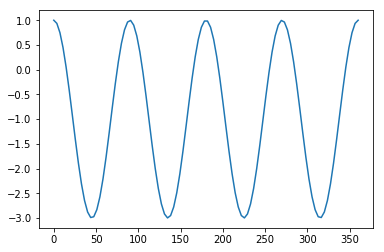

In [117]:
theta = numpy.linspace(0,360,100)
cp = 1- 4*(numpy.sin(2*math.pi*theta/180))**2
pyplot.plot(theta,cp)